In [1]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
import statsmodels.api as sm

import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
#import dataframe of all unit and all period with sales and average daily cost
df = pd.read_excel('/Users/yang/Documents/RMS Project/output.xlsx')
df

,Unit,Period,Days,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,Other Controllables,...,Average daily Crew Labor,Average daily Maintenance & Repair,Average daily Management Labor,Average daily Other Controllables,Average daily Other Labor-related Costs,Average daily Other Non-controllables,Average daily Outside Services,Average daily Promotion,Average daily Rent,Average daily Utilities
0,00040302CD88,1,30,3778,20557,2190,486,5135,3983,3167,...,16.20,171.17,132.77,105.57,114.30,262.63,282.07,13.37,-20.33,189.67
1,00040302CD88,2,31,3805,20876,2058,1376,1553,4255,3899,...,44.39,50.10,137.26,125.77,119.32,255.42,171.90,14.35,-5.74,158.61
2,00040302CD88,3,30,3440,19531,2291,178,2321,4241,3646,...,5.93,77.37,141.37,121.53,120.47,249.03,168.73,18.43,-17.57,156.40
3,00040302CD88,4,31,3672,20999,2056,36597,3412,5515,2581,...,1180.55,110.06,177.90,83.26,224.00,243.13,192.48,28.19,-11.39,183.84
4,00040302CD88,5,31,3827,21357,2312,29942,3345,5484,3772,...,965.87,107.90,176.90,121.68,229.32,205.97,184.74,20.48,-5.39,164.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0004030BEB57,20,30,15729,99236,10557,75243,8789,3997,2729,...,2508.10,292.97,133.23,90.97,522.60,889.07,382.53,-0.10,2145.83,207.67
212,0004030BEB57,21,31,12227,108507,13137,94509,1704,4989,6187,...,3048.68,54.97,160.94,199.58,491.81,1269.26,521.68,-36.90,2623.77,209.03
213,0004030BEB57,22,31,15255,101713,10812,82894,3256,4278,4408,...,2674.00,105.03,138.00,142.19,521.55,907.74,360.94,85.97,1880.90,265.68
214,0004030BEB57,23,28,15020,98547,11558,83338,3605,5253,3443,...,2976.36,128.75,187.61,122.96,587.64,999.96,380.21,21.71,2028.07,94.86


In [3]:
# Negative Value in rent, replace the average of the positive value for each unit for the negative ones
# Create a new column 'Adjusted Daily Rent' with the same values as the original 'Average daily Rent' column
df['Adjusted Daily Rent'] = df['Average daily Rent']

# Replace negative values with NaN within each group
df.loc[df['Adjusted Daily Rent'] < 0, 'Adjusted Daily Rent'] = np.nan

# Calculate the average of positive values within each group
df['Adjusted Daily Rent'] = df.groupby('Unit')['Adjusted Daily Rent'].transform(lambda x: x.fillna(x[x >= 0].mean()))

# Printing the updated DataFrame
print(df)


             Unit  Period  Days  Advertising  Cost of Sales - Food  \
0    00040302CD88       1    30         3778                 20557   
1    00040302CD88       2    31         3805                 20876   
2    00040302CD88       3    30         3440                 19531   
3    00040302CD88       4    31         3672                 20999   
4    00040302CD88       5    31         3827                 21357   
..            ...     ...   ...          ...                   ...   
211  0004030BEB57      20    30        15729                 99236   
212  0004030BEB57      21    31        12227                108507   
213  0004030BEB57      22    31        15255                101713   
214  0004030BEB57      23    28        15020                 98547   
215  0004030BEB57      24    31        17368                110366   

     Cost of Sales - Paper  Crew Labor  Maintenance & Repair  \
0                     2190         486                  5135   
1                     2058     

In [4]:
# Show all rows of average daily rent 
pd.set_option('display.max_rows', None)  
print(df['Adjusted Daily Rent'])

0        15.003333
1        15.003333
2        15.003333
3        15.003333
4        15.003333
5        15.003333
6        15.003333
7        15.003333
8        15.003333
9        15.003333
10        4.210000
11        8.900000
12       15.003333
13       15.003333
14       15.003333
15       15.003333
16       31.900000
17       15.003333
18       15.003333
19       15.003333
20       15.003333
21       15.003333
22       15.003333
23       15.003333
24      756.630000
25      923.160000
26      946.100000
27      998.190000
28      916.550000
29      840.600000
30      977.420000
31      935.030000
32      944.450000
33      854.610000
34      942.890000
35      922.770000
36      957.230000
37      905.320000
38      846.700000
39      641.230000
40      822.550000
41      786.500000
42      864.160000
43      821.870000
44      942.580000
45      629.770000
46      774.360000
47      729.450000
48       32.130000
49      102.740000
50      104.230000
51      135.420000
52      104.

<AxesSubplot:xlabel='Rent', ylabel='Sales'>

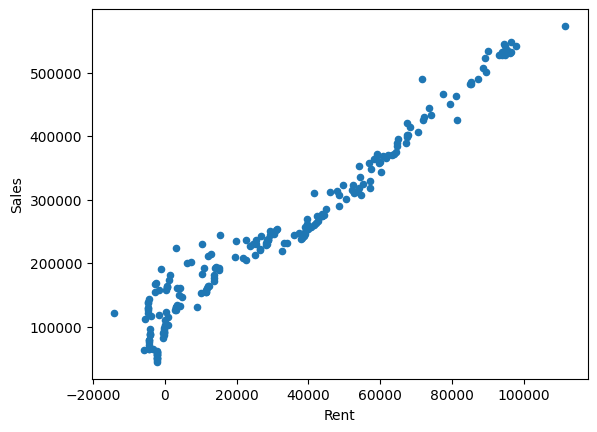

In [5]:
#Linear Regression between Rent and sales to see if they are highly correlated.
df.plot.scatter(x = 'Rent', y = 'Sales')

In [6]:
y = df['Average daily Rent']
X = df['Sales']
#need to add a constant for the intercept
X = sm.add_constant(X)

In [7]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

In [8]:
fitted_model.params

const   -810.326653
Sales      0.007439
dtype: float64

In [9]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average daily Rent   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4453.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          3.25e-145
Time:                        16:19:28   Log-Likelihood:                -1474.3
No. Observations:                 216   AIC:                             2953.
Df Residuals:                     214   BIC:                             2959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -810.3267     31.536    -25.695      0.000    -872.488    -748.166
Sales          0.0074      0.000     66.732      0.000       0.007       0.008
==============================================================================
Omnibus:                       18.030   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.979
Skew:                          -0.716   Prob(JB):                     4.59e-05
Kurtosis:                       3.410   Cond. No.                     5.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#Drop the previos average daily rent with the negative values, keep the adjusted daily rent 
df = df.drop('Average daily Rent', axis=1)
df

,Unit,Period,Days,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,Other Controllables,...,Average daily Crew Labor,Average daily Maintenance & Repair,Average daily Management Labor,Average daily Other Controllables,Average daily Other Labor-related Costs,Average daily Other Non-controllables,Average daily Outside Services,Average daily Promotion,Average daily Utilities,Adjusted Daily Rent
0,00040302CD88,1,30,3778,20557,2190,486,5135,3983,3167,...,16.20,171.17,132.77,105.57,114.30,262.63,282.07,13.37,189.67,15.003333
1,00040302CD88,2,31,3805,20876,2058,1376,1553,4255,3899,...,44.39,50.10,137.26,125.77,119.32,255.42,171.90,14.35,158.61,15.003333
2,00040302CD88,3,30,3440,19531,2291,178,2321,4241,3646,...,5.93,77.37,141.37,121.53,120.47,249.03,168.73,18.43,156.40,15.003333
3,00040302CD88,4,31,3672,20999,2056,36597,3412,5515,2581,...,1180.55,110.06,177.90,83.26,224.00,243.13,192.48,28.19,183.84,15.003333
4,00040302CD88,5,31,3827,21357,2312,29942,3345,5484,3772,...,965.87,107.90,176.90,121.68,229.32,205.97,184.74,20.48,164.81,15.003333
5,00040302CD88,6,30,3953,26257,3913,29863,5861,5416,2604,...,995.43,195.37,180.53,86.80,223.63,258.20,189.73,13.63,170.67,15.003333
6,00040302CD88,7,31,4275,25724,2832,31574,1379,4927,2496,...,1018.52,44.48,158.94,80.52,221.68,242.10,360.23,39.10,160.45,15.003333
7,00040302CD88,8,30,3864,23801,2578,27787,2599,5218,3221,...,926.23,86.63,173.93,107.37,204.63,246.43,174.10,16.07,201.73,15.003333
8,00040302CD88,9,31,4082,23452,2686,31487,1611,5048,5273,...,1015.71,51.97,162.84,170.10,204.94,252.13,127.29,-9.77,191.52,15.003333
9,00040302CD88,10,31,4268,27442,3181,29127,976,5197,2043,...,939.58,31.48,167.65,65.90,215.55,278.52,267.32,17.23,205.39,15.003333


In [11]:
#sum up from column 19th to the end to get average daily cost
df['Average Daily Cost'] = df.iloc[:, 18:].sum(axis=1)
df

,Unit,Period,Days,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,Other Controllables,...,Average daily Maintenance & Repair,Average daily Management Labor,Average daily Other Controllables,Average daily Other Labor-related Costs,Average daily Other Non-controllables,Average daily Outside Services,Average daily Promotion,Average daily Utilities,Adjusted Daily Rent,Average Daily Cost
0,00040302CD88,1,30,3778,20557,2190,486,5135,3983,3167,...,171.17,132.77,105.57,114.30,262.63,282.07,13.37,189.67,15.003333,2060.983333
1,00040302CD88,2,31,3805,20876,2058,1376,1553,4255,3899,...,50.10,137.26,125.77,119.32,255.42,171.90,14.35,158.61,15.003333,1831.933333
2,00040302CD88,3,30,3440,19531,2291,178,2321,4241,3646,...,77.37,141.37,121.53,120.47,249.03,168.73,18.43,156.40,15.003333,1801.663333
3,00040302CD88,4,31,3672,20999,2056,36597,3412,5515,2581,...,110.06,177.90,83.26,224.00,243.13,192.48,28.19,183.84,15.003333,3182.123333
4,00040302CD88,5,31,3827,21357,2312,29942,3345,5484,3772,...,107.90,176.90,121.68,229.32,205.97,184.74,20.48,164.81,15.003333,2956.193333
5,00040302CD88,6,30,3953,26257,3913,29863,5861,5416,2604,...,195.37,180.53,86.80,223.63,258.20,189.73,13.63,170.67,15.003333,3334.653333
6,00040302CD88,7,31,4275,25724,2832,31574,1379,4927,2496,...,44.48,158.94,80.52,221.68,242.10,360.23,39.10,160.45,15.003333,3262.183333
7,00040302CD88,8,30,3864,23801,2578,27787,2599,5218,3221,...,86.63,173.93,107.37,204.63,246.43,174.10,16.07,201.73,15.003333,3031.423333
8,00040302CD88,9,31,4082,23452,2686,31487,1611,5048,5273,...,51.97,162.84,170.10,204.94,252.13,127.29,-9.77,191.52,15.003333,3024.903333
9,00040302CD88,10,31,4268,27442,3181,29127,976,5197,2043,...,31.48,167.65,65.90,215.55,278.52,267.32,17.23,205.39,15.003333,3191.463333


# Diagram and regression analysis for all the units for each time period

<AxesSubplot:xlabel='Sales', ylabel='Average Daily Cost'>

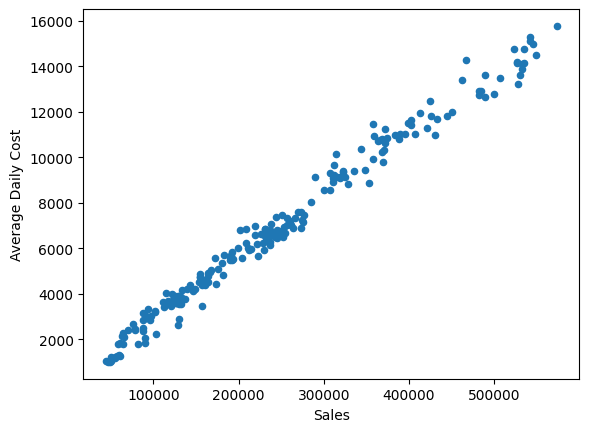

In [12]:
df.plot.scatter(x = 'Sales', y = 'Average Daily Cost')

In [13]:
import statsmodels.api as sm

In [14]:
y = df['Average Daily Cost']
X = df['Sales']
#need to add a constant for the intercept
X = sm.add_constant(X)

In [15]:
X.head()

,const,Sales
0,1.0,89952
1,1.0,90594
2,1.0,81909
3,1.0,87418
4,1.0,91109


In [16]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()

In [17]:
fitted_model.params

const    263.081379
Sales      0.027034
dtype: float64

In [18]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average Daily Cost   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.338e+04
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          6.59e-195
Time:                        16:19:28   Log-Likelihood:                -1634.2
No. Observations:                 216   AIC:                             3272.
Df Residuals:                     214   BIC:                             3279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.0814     66.114      3.979      0.000     132.764     393.399
Sales          0.0270      0.000    115.681      0.000       0.027       0.027
==============================================================================
Omnibus:                        4.170   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                4.472
Skew:                           0.170   Prob(JB):                        0.107
Kurtosis:                       3.618   Cond. No.                     5.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# create dummy variables for the 8 locations 

In [19]:
# Assuming your data is stored in a DataFrame called 'df'
# Create dummy variables for the Unit column
dummy_units = pd.get_dummies(df['Unit'], prefix='Unit', drop_first=True)
dummy_units = dummy_units.astype(int)

In [20]:

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_units], axis=1)



In [21]:
# Define the independent and dependent variables
X = df[['Sales'] + list(dummy_units.columns)]
y = df['Average Daily Cost']


In [22]:

# Add a constant to the independent variables
X = sm.add_constant(X)
X


,const,Sales,Unit_00040302CE36,Unit_00040302CF03,Unit_00040302CF28,Unit_00040302D006,Unit_00040302D014,Unit_0004030A635E,Unit_0004030B92EE,Unit_0004030BEB57
0,1.0,89952,0,0,0,0,0,0,0,0
1,1.0,90594,0,0,0,0,0,0,0,0
2,1.0,81909,0,0,0,0,0,0,0,0
3,1.0,87418,0,0,0,0,0,0,0,0
4,1.0,91109,0,0,0,0,0,0,0,0
5,1.0,94117,0,0,0,0,0,0,0,0
6,1.0,101795,0,0,0,0,0,0,0,0
7,1.0,92009,0,0,0,0,0,0,0,0
8,1.0,97194,0,0,0,0,0,0,0,0
9,1.0,101624,0,0,0,0,0,0,0,0


In [23]:
# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()


In [24]:
# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Average Daily Cost   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1790.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          2.65e-190
Time:                        16:19:28   Log-Likelihood:                -1610.4
No. Observations:                 216   AIC:                             3241.
Df Residuals:                     206   BIC:                             3275.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.5330    172.67

# practical use 

In [25]:
#try rent against revenue, if it is not significant drop it 
#benchmark using the coefficicnet, see which one is above average and below average. 
#find other combination factor against net revenue 

<Figure size 1500x1000 with 0 Axes>

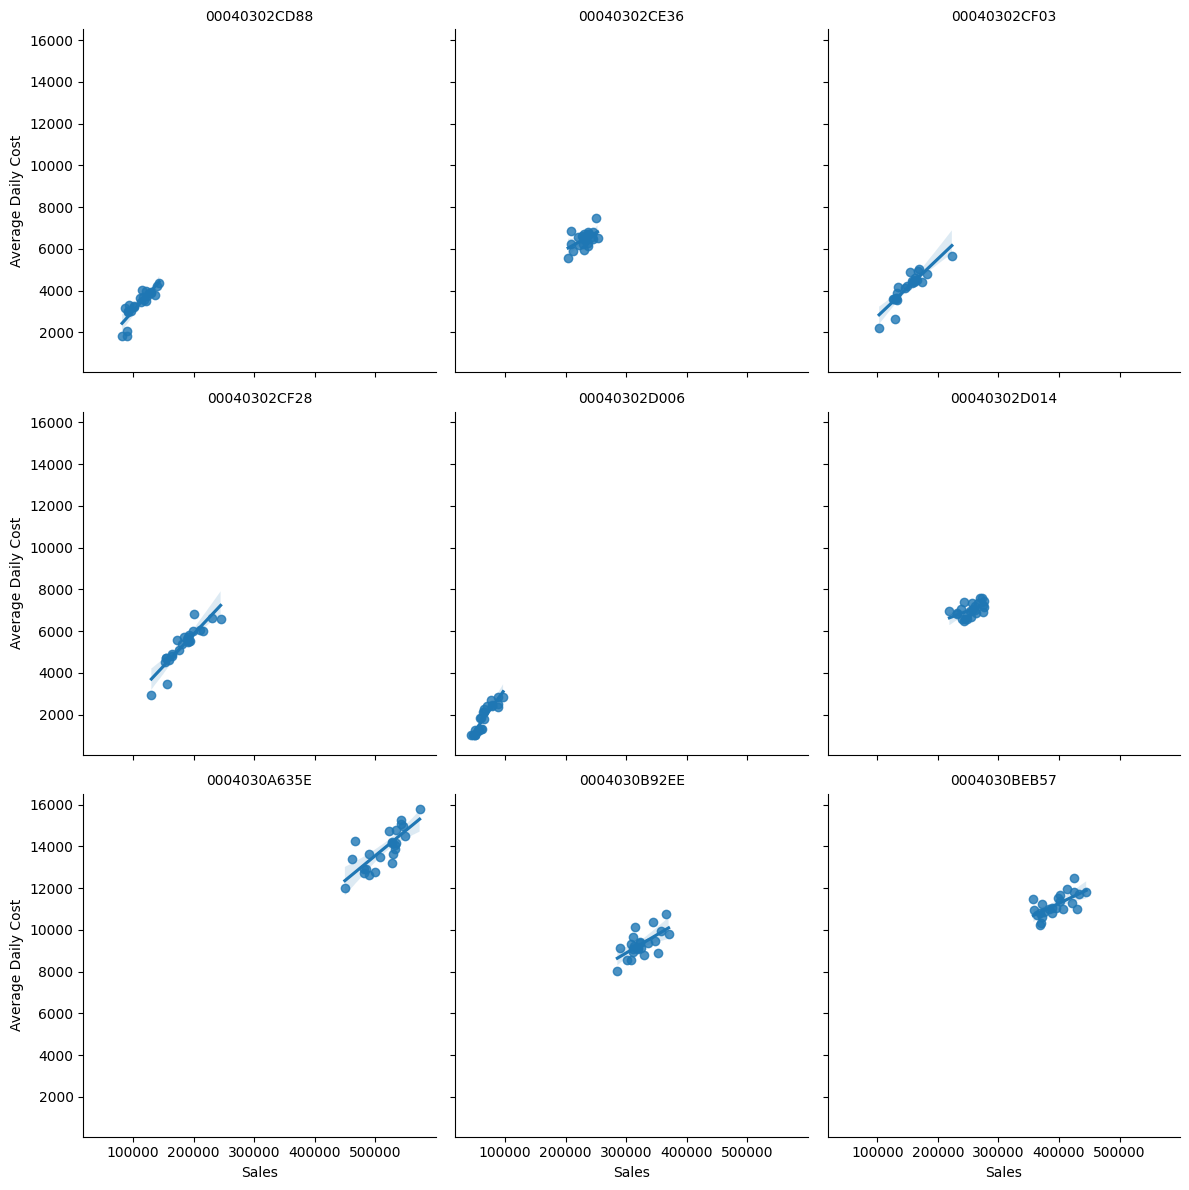

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create a regression plot for each unit
g = sns.lmplot(x="Sales", y="Average Daily Cost", col="Unit", data=df, col_wrap=3, height=4)

# Set the titles for the plots
g.set_titles("{col_name}")

# Display the plot
plt.show()

In [27]:
##Get coefficient for each linear regression 
import statsmodels.api as sm

# Get the unique units
units = df['Unit'].unique()

# Create an empty dictionary to store the regression results
results = {}

# Iterate through each unit
for unit in units:
    # Filter the dataframe for the current unit
    df_unit = df[df['Unit'] == unit]

    # Define the dependent variable (Sales) and the independent variable (Average daily Rent)
    Y = df_unit['Average Daily Cost']
    X = df_unit['Sales']

    # Add a constant to the independent variables
    X = sm.add_constant(X)

    # Fit the Ordinary Least Squares (OLS) model
    model = sm.OLS(Y, X)

    # Get the results of the model
    result = model.fit()

    # Store the results in the dictionary
    results[unit] = result

# Print the summary of each regression
for unit, result in results.items():
    print(f"Regression Summary for Unit: {unit}")
    print(result.summary())
    print("\n---\n")

Regression Summary for Unit: 00040302CD88
                            OLS Regression Results                            
Dep. Variable:     Average Daily Cost   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     57.63
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.39e-07
Time:                        16:19:30   Log-Likelihood:                -174.98
No. Observations:                  24   AIC:                             354.0
Df Residuals:                      22   BIC:                             356.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

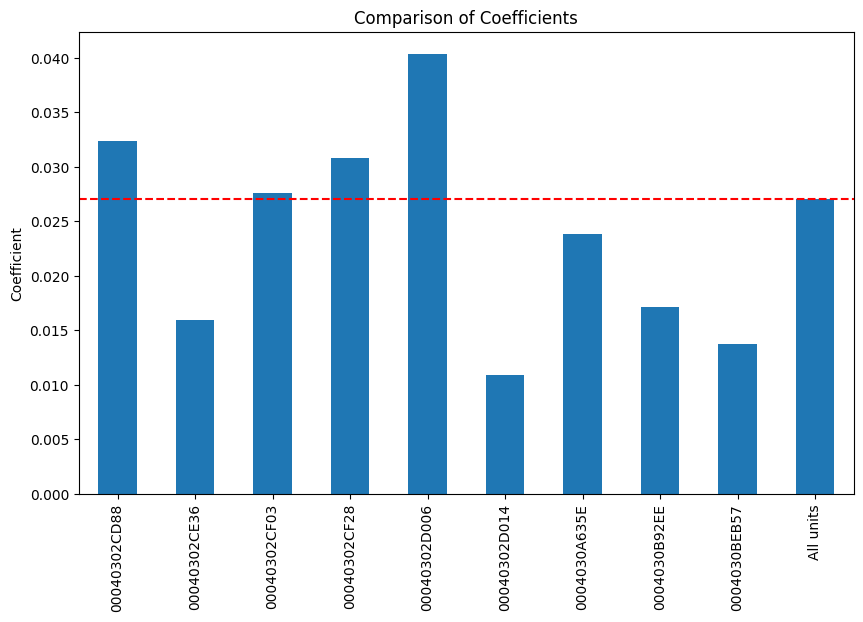

In [28]:
# Fit a linear regression model for all data points
Y_all = df['Average Daily Cost']
X_all = df['Sales']
X_all = sm.add_constant(X_all)
model_all = sm.OLS(Y_all, X_all)
result_all = model_all.fit()

# Get the coefficient from the model fitted on all data points
coef_all = result_all.params['Sales']

# Get the coefficients for each unit
coefs_units = {unit: result.params['Sales'] for unit, result in results.items()}

# Add the coefficient from the model fitted on all data points to the dictionary
coefs_units['All units'] = coef_all

# Convert the dictionary to a pandas Series for easy plotting
coef_series = pd.Series(coefs_units)

# Plot the coefficients
plt.figure(figsize=(10, 6))
coef_series.plot(kind='bar')
plt.axhline(y=coef_all, color='r', linestyle='--')
plt.ylabel('Coefficient')
plt.title('Comparison of Coefficients')
plt.show()
